# Modelado del conjunto de datos
A lo largo de este notebook se cubre la tercera fase de la metodología CRIPS-DM, en este caso la preparación dec los datos

1. **Comprensión del Negocio (Business Understanding)**
   - Consistente en el entendimiento del objetivo del proyecto.

2. **Comprensión de los Datos (Data Understanding)**
   - Relacionada con la carga y primera evaluación del conjunto de datos. Se divide a su vez en :


3. **Preparación de los Datos (Data Preparation)** 
   - Consistente en la limpieza, preparación y extracción de características de los datos.

4. <span style="color:#66FF99;">**Modelado (Modeling)**  </span> 
   - Relacionada con la elección del modelo de machine learning y el ajuste hiperparamétrico.

5. **Evaluación (Evaluation)**  
   - Evaluación de los resultados obtenidos por el modelo.

6. **Implementación (Deployment)**  
   - Integración del modelo de forma que sea accesible para su uso.


In [1]:
from ultralytics import YOLO
import cv2


In [2]:

# Cargar el modelo YOLOv8 preentrenado
model = YOLO("yolov8n.pt")  # Puedes cambiar por yolov8s.pt, yolov8m.pt, etc.


100%|██████████| 6.23M/6.23M [00:00<00:00, 51.3MB/s]


In [ ]:

# Cargar imagen
image_path = r"C:\Users\ruben\Desktop\code_tfm\dataset\coco\train2017\000000001756.jpg"
image = cv2.imread(image_path)
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)


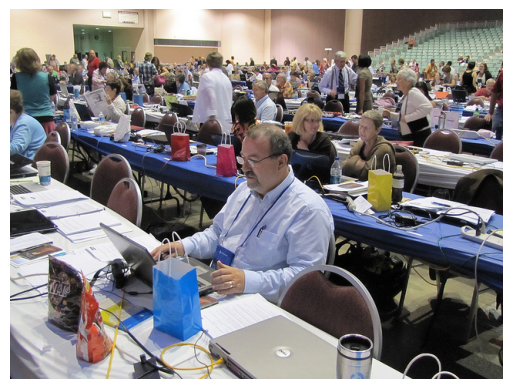

In [11]:
from PIL import Image
import matplotlib.pyplot as plt

# Load the image using Pillow (already in RGB format)
image_path = r"C:\Users\ruben\Desktop\code_tfm\dataset\coco\train2017\000000001756.jpg"
image = Image.open(image_path)

# Display the image
plt.imshow(image)
plt.axis('off')  # To hide axis
plt.show()

In [15]:
image_path = r"C:\Users\ruben\Desktop\code_tfm\dataset\coco\train2017\000000001756.jpg"
image = Image.open(image_path)

# Ejecutar predicción
results = model(image)[0]

# Lista para almacenar las cajas de los perros en formato YOLO
yolo_boxes = []

# ID de la clase 'dog' en COCO (es la clase 16)
DOG_CLASS_ID = 1  # Actualiza a 16 si estás usando COCO dataset

# Obtener dimensiones de la imagen para normalizar las coordenadas
img_width, img_height = image.size

# Iterar sobre los resultados
for box in results.boxes:
    cls_id = int(box.cls.item())
    if cls_id == DOG_CLASS_ID:
        # Obtener coordenadas (x1, y1, x2, y2)
        x1, y1, x2, y2 = map(int, box.xyxy[0])

        # Calcular el centro y las dimensiones normalizadas
        center_x = (x1 + x2) / 2 / img_width
        center_y = (y1 + y2) / 2 / img_height
        width = (x2 - x1) / img_width
        height = (y2 - y1) / img_height

        # Almacenar las coordenadas en formato YOLO
        yolo_boxes.append(f"{DOG_CLASS_ID} {center_x} {center_y} {width} {height}")

        # Dibujar la caja en la imagen original para mostrarla
        cv2.rectangle(image, (x1, y1), (x2, y2), (0, 255, 0), 2)



# Mostrar todas las cajas en formato YOLO por consola
print("Bounding boxes de perros detectados en formato YOLO:")
for bbox in yolo_boxes:
    print(bbox)

# (Opcional) Guardar las coordenadas en un archivo de texto si es necesario
with open("dog_bboxes.txt", "w") as f:
    for bbox in yolo_boxes:
        f.write(f"{bbox}\n")


0: 480x640 11 persons, 6 cups, 10 chairs, 3 dining tables, 7 laptops, 452.8ms
Speed: 2.8ms preprocess, 452.8ms inference, 2.0ms postprocess per image at shape (1, 3, 480, 640)


Bounding boxes de perros detectados en formato YOLO:


In [17]:
yolo_boxes

[]

In [18]:
import cv2
from PIL import Image
import torch

# Cargar el modelo preentrenado (suponiendo que 'model' está cargado correctamente)
# model = torch.hub.load('ultralytics/yolov5', 'yolov5s')  # Descomentar si no está cargado

# Cargar la imagen
image_path = r"C:\Users\ruben\Desktop\code_tfm\dataset\coco\train2017\000000001756.jpg"
image = Image.open(image_path)

# Ejecutar predicción
results = model(image)[0]

# Lista para almacenar las cajas de las personas en formato YOLO
yolo_boxes = []

# ID de la clase 'person' en COCO (es la clase 0)
PERSON_CLASS_ID = 0  # Cambiado a 0 para 'person'

# Obtener dimensiones de la imagen para normalizar las coordenadas
img_width, img_height = image.size

# Iterar sobre los resultados
for box in results.boxes:
    cls_id = int(box.cls.item())
    if cls_id == PERSON_CLASS_ID:
        # Obtener coordenadas (x1, y1, x2, y2)
        x1, y1, x2, y2 = map(int, box.xyxy[0])

        # Calcular el centro y las dimensiones normalizadas
        center_x = (x1 + x2) / 2 / img_width
        center_y = (y1 + y2) / 2 / img_height
        width = (x2 - x1) / img_width
        height = (y2 - y1) / img_height

        # Almacenar las coordenadas en formato YOLO
        yolo_boxes.append(f"{PERSON_CLASS_ID} {center_x} {center_y} {width} {height}")

        # Dibujar la caja en la imagen original para mostrarla
        cv2.rectangle(image, (x1, y1), (x2, y2), (0, 255, 0), 2)

# Mostrar la imagen con las personas detectadas
cv2.imshow("Personas detectadas", image)
cv2.waitKey(0)
cv2.destroyAllWindows()

# Mostrar todas las cajas en formato YOLO por consola
print("Bounding boxes de personas detectadas en formato YOLO:")
for bbox in yolo_boxes:
    print(bbox)

# (Opcional) Guardar las coordenadas en un archivo de texto si es necesario
with open("person_bboxes.txt", "w") as f:
    for bbox in yolo_boxes:
        f.write(f"{bbox}\n")



0: 480x640 11 persons, 6 cups, 10 chairs, 3 dining tables, 7 laptops, 334.3ms
Speed: 6.3ms preprocess, 334.3ms inference, 5.0ms postprocess per image at shape (1, 3, 480, 640)


error: OpenCV(4.10.0) :-1: error: (-5:Bad argument) in function 'rectangle'
> Overload resolution failed:
>  - img is not a numpy array, neither a scalar
>  - Expected Ptr<cv::UMat> for argument 'img'
>  - img is not a numpy array, neither a scalar
>  - Expected Ptr<cv::UMat> for argument 'img'


In [19]:
import cv2
import numpy as np
from PIL import Image
import torch

# Cargar el modelo preentrenado (suponiendo que 'model' está cargado correctamente)
# model = torch.hub.load('ultralytics/yolov5', 'yolov5s')  # Descomentar si no está cargado

# Cargar la imagen
image_path = r"C:\Users\ruben\Desktop\code_tfm\dataset\coco\train2017\000000001756.jpg"
image = Image.open(image_path)

# Convertir la imagen a un formato que OpenCV pueda manejar (de PIL a NumPy)
image_cv = np.array(image)

# Ejecutar predicción
results = model(image)[0]

# Lista para almacenar las cajas de las personas en formato YOLO
yolo_boxes = []

# ID de la clase 'person' en COCO (es la clase 0)
PERSON_CLASS_ID = 0  # Cambiado a 0 para 'person'

# Obtener dimensiones de la imagen para normalizar las coordenadas
img_width, img_height = image.size

# Iterar sobre los resultados
for box in results.boxes:
    cls_id = int(box.cls.item())
    if cls_id == PERSON_CLASS_ID:
        # Obtener coordenadas (x1, y1, x2, y2)
        x1, y1, x2, y2 = map(int, box.xyxy[0])

        # Calcular el centro y las dimensiones normalizadas
        center_x = (x1 + x2) / 2 / img_width
        center_y = (y1 + y2) / 2 / img_height
        width = (x2 - x1) / img_width
        height = (y2 - y1) / img_height

        # Almacenar las coordenadas en formato YOLO
        yolo_boxes.append(f"{PERSON_CLASS_ID} {center_x} {center_y} {width} {height}")

        # Dibujar la caja en la imagen original para mostrarla
        cv2.rectangle(image_cv, (x1, y1), (x2, y2), (0, 255, 0), 2)

# Mostrar la imagen con las personas detectadas
cv2.imshow("Personas detectadas", image_cv)
cv2.waitKey(0)
cv2.destroyAllWindows()

# Mostrar todas las cajas en formato YOLO por consola
print("Bounding boxes de personas detectadas en formato YOLO:")
for bbox in yolo_boxes:
    print(bbox)

# (Opcional) Guardar las coordenadas en un archivo de texto si es necesario
with open("person_bboxes.txt", "w") as f:
    for bbox in yolo_boxes:
        f.write(f"{bbox}\n")



0: 480x640 11 persons, 6 cups, 10 chairs, 3 dining tables, 7 laptops, 268.9ms
Speed: 5.6ms preprocess, 268.9ms inference, 5.5ms postprocess per image at shape (1, 3, 480, 640)


Bounding boxes de personas detectadas en formato YOLO:
0 0.43515625 0.5520833333333334 0.4484375 0.49166666666666664
0 0.7265625 0.36666666666666664 0.115625 0.1875
0 0.82109375 0.26458333333333334 0.0796875 0.20833333333333334
0 0.0484375 0.21979166666666666 0.090625 0.23958333333333334
0 0.0375 0.3125 0.075 0.19166666666666668
0 0.61328125 0.35520833333333335 0.1015625 0.20625
0 0.5171875 0.25 0.05625 0.11666666666666667
0 0.66328125 0.196875 0.0828125 0.16875
0 0.4109375 0.23020833333333332 0.084375 0.22291666666666668
0 0.475 0.32083333333333336 0.05625 0.1625
0 0.71875 0.20416666666666666 0.040625 0.1625


In [20]:
model = YOLO('yolov8n-seg.pt')  # You can use yolov8s-seg.pt, yolov8m-seg.pt, yolov8l-seg.pt depending on the model size


100%|██████████| 6.73M/6.73M [00:00<00:00, 46.5MB/s]


In [22]:
results = model(image)

# Results (showing segmentation masks for detected persons)
# The results object contains multiple attributes, including masks and labels.
for result in results:
    # Extract segmentation masks and their labels (index 0 corresponds to 'person')
    for mask, label, conf in zip(result.masks.xy, result.names, result.probs):
        if label == 'person':  # Filter for persons only
            # Convert mask to a format that can be visualized with OpenCV
            mask = mask.astype('uint8') * 255

            # Overlay mask on original image
            img_with_mask = cv2.addWeighted(image, 0.7, cv2.cvtColor(mask, cv2.COLOR_GRAY2BGR), 0.3, 0)
            break

# Show the image with segmentation results
plt.imshow(cv2.cvtColor(img_with_mask, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.show()


0: 480x640 10 persons, 2 bottles, 6 cups, 10 chairs, 3 dining tables, 3 laptops, 296.7ms
Speed: 3.4ms preprocess, 296.7ms inference, 56.9ms postprocess per image at shape (1, 3, 480, 640)


TypeError: 'NoneType' object is not iterable

In [29]:
from ultralytics import YOLO
import random
import cv2
import numpy as np

In [30]:
model = YOLO("yolov8m-seg.pt")


100%|██████████| 52.4M/52.4M [00:01<00:00, 42.1MB/s]


In [ ]:
img = cv2.imread(image_path)


# if you want all classes
yolo_classes = list(model.names.values())
classes_ids = [yolo_classes.index(clas) for clas in yolo_classes]

conf = 0.5

results = model.predict(img, conf=conf)
colors = [random.choices(range(256), k=3) for _ in classes_ids]
print(results)
for i, result in enumerate(results):
    for mask, box in zip(result.masks.xy, result.boxes):
        points = np.int32([mask])
        # cv2.polylines(img, points, True, (255, 0, 0), 1)
        color_number = classes_ids.index(int(box.cls[0]))
        cv2.fillPoly(img, points, colors[color_number])


0: 480x640 8 persons, 2 bottles, 2 cups, 9 chairs, 3 laptops, 1094.5ms
Speed: 68.8ms preprocess, 1094.5ms inference, 35.6ms postprocess per image at shape (1, 3, 480, 640)


[ultralytics.yolo.engine.results.Results object with attributes:

boxes: ultralytics.yolo.engine.results.Boxes object
keypoints: None
keys: ['boxes', 'masks']
masks: ultralytics.yolo.engine.results.Masks object
names: {0: 'person', 1: 'bicycle', 2: 'car', 3: 'motorcycle', 4: 'airplane', 5: 'bus', 6: 'train', 7: 'truck', 8: 'boat', 9: 'traffic light', 10: 'fire hydrant', 11: 'stop sign', 12: 'parking meter', 13: 'bench', 14: 'bird', 15: 'cat', 16: 'dog', 17: 'horse', 18: 'sheep', 19: 'cow', 20: 'elephant', 21: 'bear', 22: 'zebra', 23: 'giraffe', 24: 'backpack', 25: 'umbrella', 26: 'handbag', 27: 'tie', 28: 'suitcase', 29: 'frisbee', 30: 'skis', 31: 'snowboard', 32: 'sports ball', 33: 'kite', 34: 'baseball bat', 35: 'baseball glove', 36: 'skateboard', 37: 'surfboard', 38: 'tennis racket', 39: 'bottle', 40: 'wine glass', 41: 'cup', 42: 'fork', 43: 'knife', 44: 'spoon', 45: 'bowl', 46: 'banana', 47: 'apple', 48: 'sandwich', 49: 'orange', 50: 'broccoli', 51: 'carrot', 52: 'hot dog', 53: 'pi

In [32]:
cv2.imshow("Image", img)
cv2.waitKey(0)

-1

In [ ]:
import cv2
import random
import numpy as np

# Function to add a legend to the image
def add_legend(img, classes, colors, font=cv2.FONT_HERSHEY_SIMPLEX, font_scale=0.5, font_color=(255, 255, 255), thickness=1, legen_index = []):
    # Define the starting position for the legend (top left corner)
    x, y = 20, 30
    
    print("classes a re", classes)
    # Loop through each class and color to add to the legend
    for i, (class_name, color) in enumerate(zip(classes, colors)):
        print("we in ", i ," iterating over", legen_index)
        if(i in legen_index ):
            print("putting text ",class_name )
            # Draw a rectangle with the class color
            cv2.rectangle(img, (x, y), (x + 20, y + 20), color, -1)
            # Add the class name next to the rectangle
            cv2.putText(img, class_name, (x + 25, y + 15), font, font_scale, font_color, thickness)
            y += 25  # Move to the next row for the next legend entry

# Read the image
img = cv2.imread(image_path)

# YOLO class labels
yolo_classes = list(model.names.values())
classes_ids = [yolo_classes.index(clas) for clas in yolo_classes]

conf = 0.5

# Predict the results using the model
results = model.predict(img, conf=conf)

# Assign random colors to each class
colors = [random.choices(range(256), k=3) for _ in classes_ids]
legen_index = []
# Process the detection results
for i, result in enumerate(results):
    for mask, box in zip(result.masks.xy, result.boxes):
        points = np.int32([mask])
        color_number = classes_ids.index(int(box.cls[0]))
        legen_index.append(classes_ids.index(int(box.cls[0])))
        cv2.fillPoly(img, points, colors[color_number])

# Add the legend to the image
print("legen index", legen_index)
add_legend(img, yolo_classes, colors, result, legen_index = legen_index)

# Display or save the image
cv2.imshow('Result with Legend', img)
cv2.waitKey(0)
cv2.destroyAllWindows()



0: 480x640 8 persons, 2 bottles, 2 cups, 9 chairs, 3 laptops, 1196.1ms
Speed: 4.4ms preprocess, 1196.1ms inference, 32.0ms postprocess per image at shape (1, 3, 480, 640)


legen index [63, 0, 56, 56, 0, 56, 56, 0, 39, 41, 39, 56, 56, 0, 0, 0, 41, 0, 63, 56, 63, 56, 56, 0]
classes a re ['person', 'bicycle', 'car', 'motorcycle', 'airplane', 'bus', 'train', 'truck', 'boat', 'traffic light', 'fire hydrant', 'stop sign', 'parking meter', 'bench', 'bird', 'cat', 'dog', 'horse', 'sheep', 'cow', 'elephant', 'bear', 'zebra', 'giraffe', 'backpack', 'umbrella', 'handbag', 'tie', 'suitcase', 'frisbee', 'skis', 'snowboard', 'sports ball', 'kite', 'baseball bat', 'baseball glove', 'skateboard', 'surfboard', 'tennis racket', 'bottle', 'wine glass', 'cup', 'fork', 'knife', 'spoon', 'bowl', 'banana', 'apple', 'sandwich', 'orange', 'broccoli', 'carrot', 'hot dog', 'pizza', 'donut', 'cake', 'chair', 'couch', 'potted plant', 'bed', 'dining table', 'toilet', 'tv', 'laptop', 'mouse', 'remote', 'keyboard', 'cell phone', 'microwave', 'oven', 'toaster', 'sink', 'refrigerator', 'book', 'clock', 'vase', 'scissors', 'teddy bear', 'hair drier', 'toothbrush']
we in  0  iterating over